In [108]:
# Import python libraries used for analysis
import pandas as pd
import scipy.stats as stats
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [109]:
# Import raw CSV file into Python panda data frame
df = pd.read_csv(r'C:\temp\D206\medical_raw_data.csv')

In [110]:
# Display max columns to prevent truncation
pd.set_option('display.max_columns', None)

#### Review detailed information about the variables and structure

In [111]:
# Review first 5 rows
df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1.0,53.0,"Some College, Less than 1 Year",Full Time,86575.93,Divorced,Male,No,17.802330,6,0,0,NaN,Emergency Admission,Yes,No,Medium,0.0,Yes,Yes,No,Yes,1.0,Yes,No,Yes,Blood Work,10.585770,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3.0,51.0,"Some College, 1 or More Years, No Degree",Full Time,46805.99,Married,Female,No,18.994640,4,2,1,No,Emergency Admission,Yes,No,High,1.0,No,No,No,No,NaN,No,Yes,No,Intravenous,15.129562,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3.0,53.0,"Some College, 1 or More Years, No Degree",Retired,14370.14,Widowed,Female,No,17.415889,4,1,0,No,Elective Admission,Yes,No,Medium,1.0,No,Yes,No,No,NaN,No,No,No,Blood Work,4.772177,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0.0,78.0,GED or Alternative Credential,Retired,39741.49,Married,Male,No,17.420079,4,1,0,No,Elective Admission,No,Yes,Medium,0.0,Yes,No,No,No,NaN,No,Yes,Yes,Blood Work,1.714879,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,NaN,22.0,Regular High School Diploma,Full Time,1209.56,Widowed,Female,No,16.870524,5,0,2,Yes,Elective Admission,No,No,Low,0.0,No,No,Yes,No,0.0,Yes,No,No,CT Scan,1.254807,1885.655137,3716.525786,2,1,3,3,5,3,4,3


In [112]:
# Print info about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            7412 non-null   float64
 16  Age  

In [113]:
# Create Index for the data frame 
df['ID'] = pd.Series(range(0,10000))

In [114]:
# Removed redundant column or columns not useful for analysis
df.drop(columns=['Unnamed: 0', 'Customer_id', 'Interaction', 'UID', 'Lat', 'Lng'], axis=1, inplace=True)
df.columns

Index(['CaseOrder', 'City', 'State', 'County', 'Zip', 'Population', 'Area',
       'Timezone', 'Job', 'Children', 'Age', 'Education', 'Employment',
       'Income', 'Marital', 'Gender', 'ReAdmis', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'VitD_supp', 'Soft_drink', 'Initial_admin',
       'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis',
       'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services',
       'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'ID'],
      dtype='object')

In [115]:
# Standardize column naming convention and Rename columns to be more descriptive.
df.rename( columns = {'CaseOrder':'Case_order',
                      'Marital':'Marital_status',
                      'ReAdmis':'Readmitted',
                      'VitD_supp':'VitD_supplements',
                      'Soft_drink':'Habitual_soft_drink_use',
                      'Initial_admin':'Initial_admission',
                      'HighBlood':'High_blood',
                      'BackPain':'Back_pain',
                      'TotalCharge':'Total_charge',
                      'Item1':'Timely_admission', 
                      'Item2':'Timely_treatment',
                      'Item3':'Timely_visits',
                      'Item4':'Reliability',
                      'Item5':'Options',
                      'Item6':'Hours_of_treatment',
                      'Item7':'Courteous_staff',
                      'Item8':'Evidence_of_active_listening_from_doctor',}, inplace=True)
df.columns

Index(['Case_order', 'City', 'State', 'County', 'Zip', 'Population', 'Area',
       'Timezone', 'Job', 'Children', 'Age', 'Education', 'Employment',
       'Income', 'Marital_status', 'Gender', 'Readmitted', 'VitD_levels',
       'Doc_visits', 'Full_meals_eaten', 'VitD_supplements',
       'Habitual_soft_drink_use', 'Initial_admission', 'High_blood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'Back_pain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'Total_charge', 'Additional_charges', 'Timely_admission',
       'Timely_treatment', 'Timely_visits', 'Reliability', 'Options',
       'Hours_of_treatment', 'Courteous_staff',
       'Evidence_of_active_listening_from_doctor', 'ID'],
      dtype='object')

In [116]:
# Examine duplicate columns
df.columns.duplicated().any()

False

In [117]:
# Examine duplicate rows
df.duplicated().any()

False

#### Examine categorical variables for misspellings, review unique characteristics, and misleading field values in the data set.

In [118]:
df['State'].unique()

array(['AL', 'FL', 'SD', 'MN', 'VA', 'OK', 'OH', 'MS', 'WI', 'IA', 'CA',
       'IN', 'MO', 'MI', 'NE', 'PA', 'AR', 'WV', 'KS', 'MA', 'KY', 'NY',
       'VT', 'DC', 'IL', 'ND', 'SC', 'AK', 'NM', 'NH', 'GA', 'NC', 'MD',
       'TN', 'WA', 'TX', 'CO', 'NJ', 'LA', 'OR', 'AZ', 'ME', 'ID', 'UT',
       'RI', 'MT', 'PR', 'NV', 'CT', 'HI', 'WY', 'DE'], dtype=object)

In [119]:
# Indication of zip codes are not all 5 digits
len(df['Zip'].unique())

8612

In [120]:
df['Area'].unique()

array(['Suburban', 'Urban', 'Rural'], dtype=object)

In [121]:
df['Timezone'].unique()

array(['America/Chicago', 'America/New_York', 'America/Los_Angeles',
       'America/Indiana/Indianapolis', 'America/Detroit',
       'America/Denver', 'America/Nome', 'America/Anchorage',
       'America/Phoenix', 'America/Boise', 'America/Puerto_Rico',
       'America/Yakutat', 'Pacific/Honolulu', 'America/Menominee',
       'America/Kentucky/Louisville', 'America/Indiana/Vincennes',
       'America/Toronto', 'America/Indiana/Marengo',
       'America/Indiana/Winamac', 'America/Indiana/Tell_City',
       'America/Sitka', 'America/Indiana/Knox',
       'America/North_Dakota/New_Salem', 'America/Indiana/Vevay',
       'America/Adak', 'America/North_Dakota/Beulah'], dtype=object)

In [122]:
df['Timezone'].describe()

count                10000
unique                  26
top       America/New_York
freq                  3889
Name: Timezone, dtype: object

In [123]:
dict_timezone = {'America/Chicago':'UTC -5:00', 
           'America/New_York':'UTC -4:00', 
           'America/Los_Angeles':'UTC -7:00',
           'America/Indiana/Indianapolis':'UTC -4:00', 
           'America/Detroit':'UTC -4:00',
           'America/Denver':'UTC -6:00', 
           'America/Nome':'UTC -8:00', 
           'America/Anchorage':'UTC -8:00',
           'America/Phoenix':'UTC -7:00', 
           'America/Boise':'UTC -6:00', 
           'America/Puerto_Rico':'UTC -4:00',
           'America/Yakutat':'UTC -8:00', 
           'Pacific/Honolulu':'UTC -10:00', 
           'America/Menominee':'UTC -5:00',
           'America/Kentucky/Louisville':'UTC -4:00', 
           'America/Indiana/Vincennes':'UTC -4:00',
           'America/Toronto':'UTC -4:00', 
           'America/Indiana/Marengo':'UTC -4:00',
           'America/Indiana/Winamac':'UTC -4:00', 
           'America/Indiana/Tell_City':'UTC -5:00',
           'America/Sitka':'UTC -8:00', 
           'America/Indiana/Knox':'UTC -5:00',
           'America/North_Dakota/New_Salem':'UTC -5:00', 
           'America/Indiana/Vevay':'UTC -5:00',
           'America/Adak':'UTC -9:00', 
           'America/North_Dakota/Beulah':'UTC -5:00'}

df['Timezone'].replace(dict_timezone, inplace = True)
df['Timezone']

0       UTC -5:00
1       UTC -5:00
2       UTC -5:00
3       UTC -5:00
4       UTC -4:00
          ...    
9995    UTC -4:00
9996    UTC -4:00
9997    UTC -5:00
9998    UTC -6:00
9999    UTC -4:00
Name: Timezone, Length: 10000, dtype: object

In [124]:
df['Education'].unique() 

array(['Some College, Less than 1 Year',
       'Some College, 1 or More Years, No Degree',
       'GED or Alternative Credential', 'Regular High School Diploma',
       "Bachelor's Degree", "Master's Degree",
       'Nursery School to 8th Grade',
       '9th Grade to 12th Grade, No Diploma', 'Doctorate Degree',
       "Associate's Degree", 'Professional School Degree',
       'No Schooling Completed'], dtype=object)

In [125]:
df['Job'].unique() 

array(['Psychologist, sport and exercise', 'Community development worker',
       'Chief Executive Officer', 'Early years teacher',
       'Health promotion specialist', 'Corporate treasurer',
       'Hydrologist', 'Psychiatric nurse', 'Computer games developer',
       'Production assistant, radio', 'Contractor',
       'Surveyor, planning and development',
       'English as a second language teacher', 'Actuary', 'Media planner',
       'Fast food restaurant manager', 'Horticulturist, commercial',
       'Secretary, company', 'Designer, graphic', 'Personnel officer',
       'Telecommunications researcher', 'Restaurant manager, fast food',
       'Surveyor, minerals', 'Architectural technologist',
       'Therapist, speech and language', 'Accounting technician',
       'Glass blower/designer', 'Travel agency manager', 'Illustrator',
       'Police officer', 'Accountant, chartered public finance',
       'Sport and exercise psychologist', 'Pensions consultant',
       'Community educat

In [126]:
# High number of unique jobs
df['Job'].describe()

count                                    10000
unique                                     639
top       Outdoor activities/education manager
freq                                        29
Name: Job, dtype: object

In [127]:
df['Employment'].unique()

array(['Full Time', 'Retired', 'Unemployed', 'Student', 'Part Time'],
      dtype=object)

In [128]:
df['Marital_status'].unique()

array(['Divorced', 'Married', 'Widowed', 'Never Married', 'Separated'],
      dtype=object)

In [129]:
 # Data dictionary indicates non-binary, field values are "Prefer not to answer"
df['Gender'].unique()

array(['Male', 'Female', 'Prefer not to answer'], dtype=object)

In [130]:
df['Readmitted'].unique()

array(['No', 'Yes'], dtype=object)

In [131]:
df['Initial_admission'].unique()

array(['Emergency Admission', 'Elective Admission',
       'Observation Admission'], dtype=object)

In [132]:
df['Services'].unique()

array(['Blood Work', 'Intravenous', 'CT Scan', 'MRI'], dtype=object)

In [133]:
df['Complication_risk'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

#### Detecting Missing Data

In [134]:
df.isnull().sum()

Case_order                                     0
City                                           0
State                                          0
County                                         0
Zip                                            0
Population                                     0
Area                                           0
Timezone                                       0
Job                                            0
Children                                    2588
Age                                         2414
Education                                      0
Employment                                     0
Income                                      2464
Marital_status                                 0
Gender                                         0
Readmitted                                     0
VitD_levels                                    0
Doc_visits                                     0
Full_meals_eaten                               0
VitD_supplements    

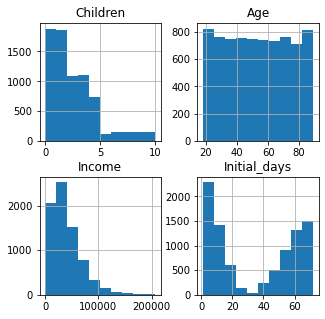

In [135]:
# Examine distribution for missing variables
df[['Children', 'Age', 'Income','Initial_days']].hist(figsize = (5,5))
plt.show()

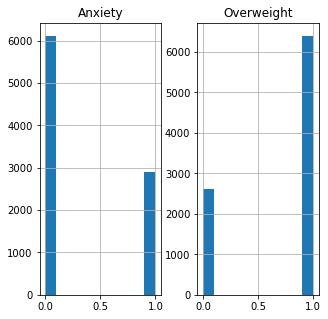

In [136]:
df[['Anxiety', 'Overweight']].hist(figsize = (5,5))
plt.show()

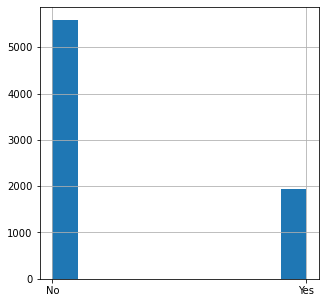

In [137]:
df['Habitual_soft_drink_use'].hist(figsize = (5,5))
plt.show()

#### Treat missing values by filling nulls with mean, median, or mode.

In [138]:
# Use mean to impute uniform distribution
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Use median to impute numerical variable skewed
df['Children'].fillna(df['Children'].median(), inplace=True)
df['Income'].fillna(df['Income'].median(), inplace=True)
df['Initial_days'].fillna(df['Initial_days'].median(), inplace=True)

# Use mode to impute missing categorical variables.
df['Anxiety'] = df['Anxiety'].fillna(df['Anxiety'].mode()[0])
df['Overweight'] = df['Overweight'].fillna(df['Overweight'].mode()[0])
df['Habitual_soft_drink_use'] = df['Habitual_soft_drink_use'].fillna(df['Habitual_soft_drink_use'].mode()[0])

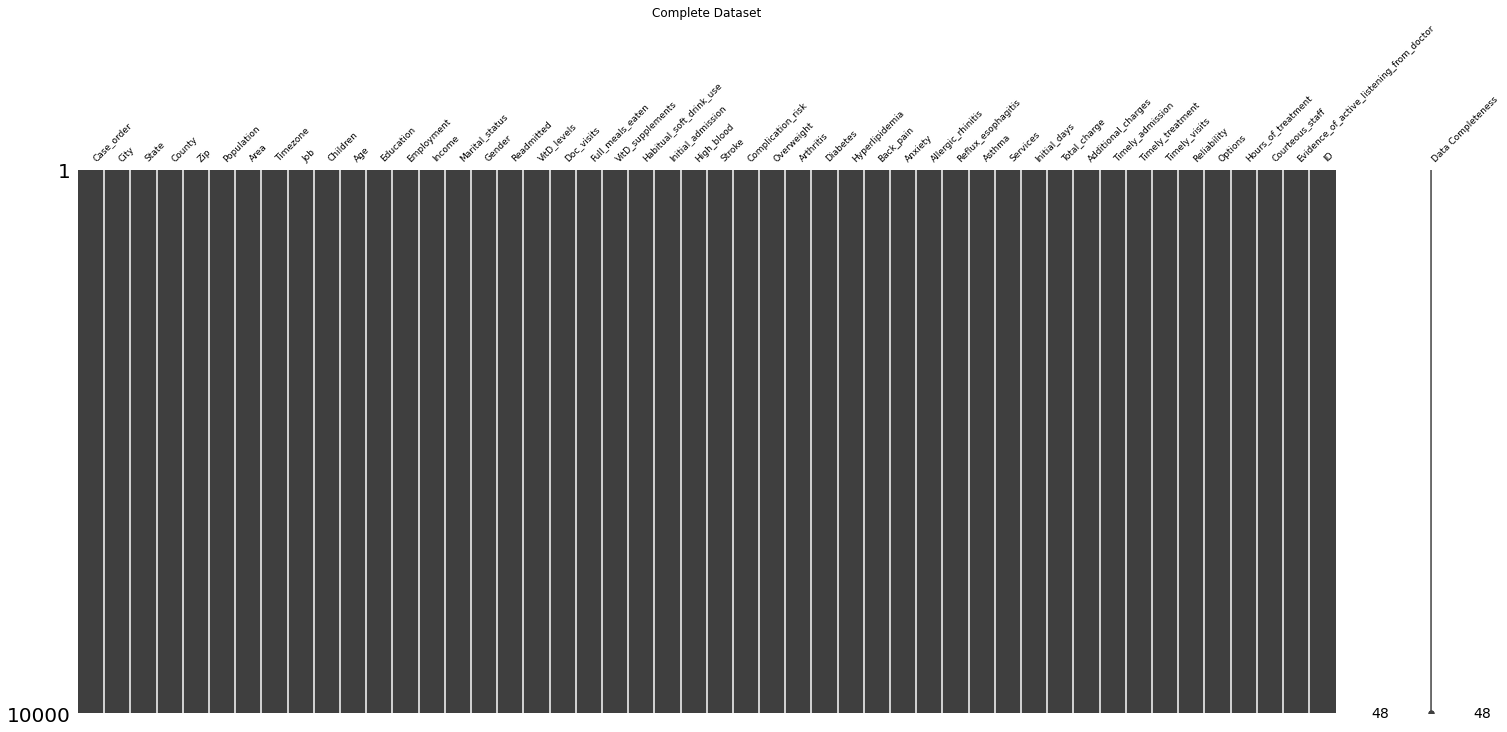

In [139]:
# Visualization of variables
msno.matrix(df, fontsize=9,labels=True)
plt.title('Complete Dataset')
plt.show()

#### Convert data type Floats to Ints

In [140]:
df[['Children','Age','Overweight','Anxiety']].head()

,Children,Age,Overweight,Anxiety
0,1.0,53.0,0.0,1.0
1,3.0,51.0,1.0,0.0
2,3.0,53.0,1.0,0.0
3,0.0,78.0,0.0,0.0
4,1.0,22.0,0.0,0.0


In [141]:
df['Children'] = df['Children'].astype(int)

In [142]:
df['Age'] = df['Age'].astype(int)

In [143]:
df['Overweight'] = df['Overweight'].astype(int)

In [144]:
df['Anxiety'] = df['Anxiety'].astype(int)

df[['Children','Age','Overweight','Anxiety']].head()

,Children,Age,Overweight,Anxiety
0,1,53,0,1
1,3,51,1,0
2,3,53,1,0
3,0,78,0,0
4,1,22,0,0


#### Convert decimal precision 2 decimal places

In [145]:
df[['VitD_levels','Initial_days','Total_charge','Additional_charges']].head()

,VitD_levels,Initial_days,Total_charge,Additional_charges
0,17.802330,10.585770,3191.048774,17939.403420
1,18.994640,15.129562,4214.905346,17612.998120
2,17.415889,4.772177,2177.586768,17505.192460
3,17.420079,1.714879,2465.118965,12993.437350
4,16.870524,1.254807,1885.655137,3716.525786


In [146]:
df['VitD_levels'] = df['VitD_levels'].round(decimals = 2)

In [147]:
df['Initial_days'] = df['Initial_days'].round(decimals = 2)

In [148]:
df['Total_charge'] = df['Total_charge'].round(decimals = 2)

In [149]:
df['Additional_charges'] = df['Additional_charges'].round(decimals = 2)

df[['VitD_levels','Initial_days','Total_charge','Additional_charges']].head()

,VitD_levels,Initial_days,Total_charge,Additional_charges
0,17.80,10.59,3191.05,17939.40
1,18.99,15.13,4214.91,17613.00
2,17.42,4.77,2177.59,17505.19
3,17.42,1.71,2465.12,12993.44
4,16.87,1.25,1885.66,3716.53


#### Search for zip codes with less than 5 digits

In [150]:
# Convert Zip to string data type 
df['Zip'] = df['Zip'].astype(str)

#df['Zip'][df['Zip'].apply(len) == 5] # 9,277 zip codes length of 5
df['Zip'][df['Zip'].apply(len) != 5] # 723 zip codes not equal to length of 5

31      2584
35      5043
36      2468
37      2138
67      3464
        ... 
9975    4415
9976    6084
9982    8401
9993    7647
9996    8340
Name: Zip, Length: 723, dtype: object

#### Fill leading zeros that have been omitted.

In [151]:
df['Zip'] = df['Zip'].str.zfill(5)
print(df['Zip'])

0       35621
1       32446
2       57110
3       56072
4       23181
        ...  
9995    27563
9996    08340
9997    37171
9998    57775
9999    15108
Name: Zip, Length: 10000, dtype: object


In [152]:
# Validate the changes
df['Zip'][df['Zip'].apply(len) != 5]

Series([], Name: Zip, dtype: object)

#### Detect and Identify Outliers

array([[<AxesSubplot:title={'center':'Case_order'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Children'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'VitD_levels'}>,
        <AxesSubplot:title={'center':'Doc_visits'}>,
        <AxesSubplot:title={'center':'Full_meals_eaten'}>,
        <AxesSubplot:title={'center':'VitD_supplements'}>,
        <AxesSubplot:title={'center':'Overweight'}>],
       [<AxesSubplot:title={'center':'Anxiety'}>,
        <AxesSubplot:title={'center':'Initial_days'}>,
        <AxesSubplot:title={'center':'Total_charge'}>,
        <AxesSubplot:title={'center':'Additional_charges'}>,
        <AxesSubplot:title={'center':'Timely_admission'}>],
       [<AxesSubplot:title={'center':'Timely_treatment'}>,
        <AxesSubplot:title={'center':'Timely_visits'}>,
        <AxesSubplot:title={'center':'Reliability'}>,
        <AxesSubpl

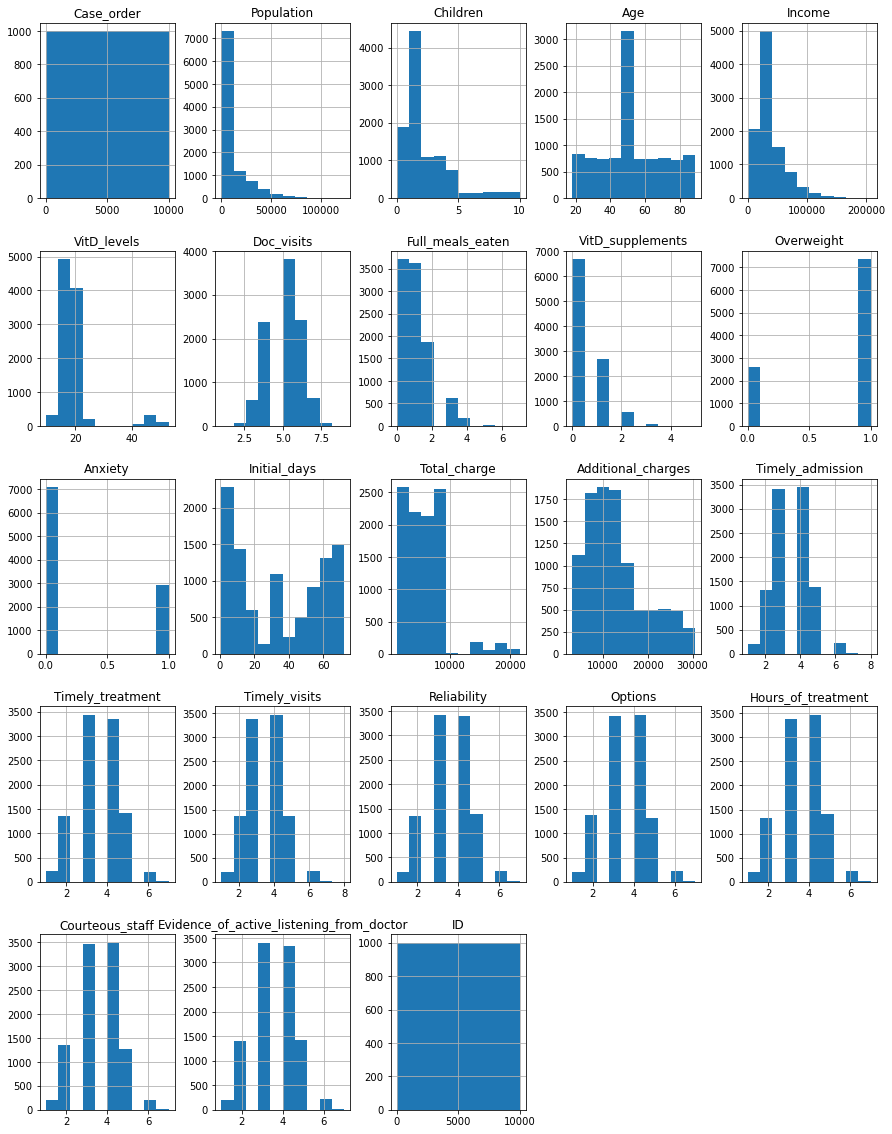

In [153]:
# Display histograms of numerical values
df.hist(figsize = (15,20))

In [154]:
# Potential Outliers identified. Create a new data frame.
df_train = df.loc[:,['Population', 'Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten',  'VitD_supplements', 'Initial_days', 'Total_charge', 'Additional_charges']]
df_train.head()

,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supplements,Initial_days,Total_charge,Additional_charges
0,2951,1,53,86575.93,17.80,6,0,0,10.59,3191.05,17939.40
1,11303,3,51,46805.99,18.99,4,2,1,15.13,4214.91,17613.00
2,17125,3,53,14370.14,17.42,4,1,0,4.77,2177.59,17505.19
3,2162,0,78,39741.49,17.42,4,1,0,1.71,2465.12,12993.44
4,5287,1,22,1209.56,16.87,5,0,2,1.25,1885.66,3716.53


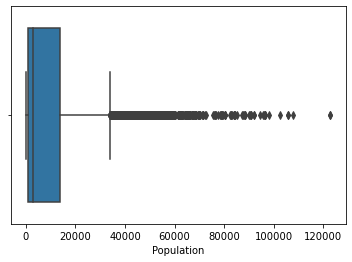

In [155]:
boxplot=sns.boxplot(x='Population',data=df_train) 

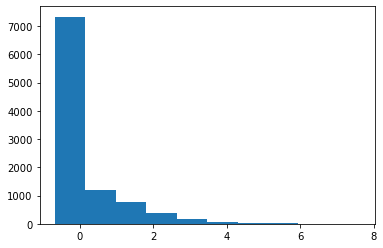

In [156]:
# Standardize Numeric Field, Query Outliers, Sort values, Plot Z-Score.
df_train['Z_Score_Population'] = stats.zscore(df_train['Population'])
Population_outlier = df_train.query('Z_Score_Population > 3 | Z_Score_Population < -3')
Population_sorted = df_train.sort_values(['Z_Score_Population'], ascending = False)

plt.hist(df_train['Z_Score_Population'])
plt.show()

In [157]:
Population_sorted[['Z_Score_Population','Population']].head(n=15)

,Z_Score_Population,Population
3024,7.612562,122814
9662,7.612562,122814
5965,6.593000,107700
7686,6.464762,105799
767,6.464762,105799
6502,6.250583,102624
9118,5.953430,98219
7902,5.839493,96530
6813,5.839493,96530
6686,5.836592,96487


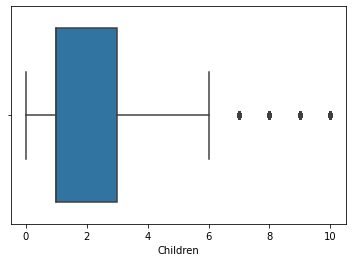

In [158]:
boxplot=sns.boxplot(x='Children',data=df_train) 

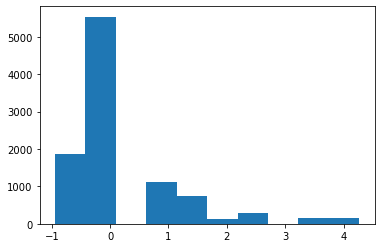

In [159]:
df_train['Z_Score_Children'] = stats.zscore(df_train['Children'])
Children_outliers = df_train.query('Z_Score_Children > 3 | Z_Score_Children < -3')
Children_sorted = df_train.sort_values(['Z_Score_Children'], ascending = False)

plt.hist(df_train['Z_Score_Children'])
plt.show()

In [160]:
Children_sorted[['Z_Score_Children','Children']].head(n=15)

,Z_Score_Children,Children
185,4.270496,10
7781,4.270496,10
5272,4.270496,10
6363,4.270496,10
5817,4.270496,10
156,4.270496,10
7300,4.270496,10
8105,4.270496,10
9658,4.270496,10
7835,4.270496,10


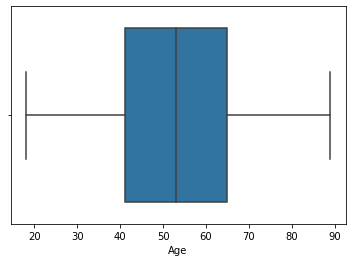

In [161]:
boxplot=sns.boxplot(x='Age',data=df_train) 

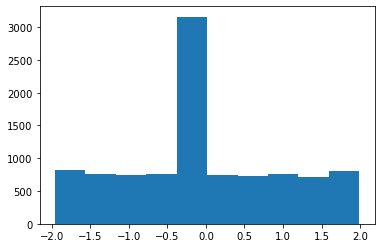

In [162]:
df_train['Z_Score_Age'] = stats.zscore(df_train['Age'])
Age_outliers = df_train.query('Z_Score_Age > 3 | Z_Score_Age < -3')
Age_sorted = df_train.sort_values(['Z_Score_Age'], ascending = False)

plt.hist(df_train['Z_Score_Age'])
plt.show()

In [163]:
Age_sorted[['Z_Score_Age','Age']].head(n=15)

,Z_Score_Age,Age
4241,1.988321,89
1446,1.988321,89
7566,1.988321,89
415,1.988321,89
6127,1.988321,89
536,1.988321,89
2586,1.988321,89
1609,1.988321,89
1593,1.988321,89
3939,1.988321,89


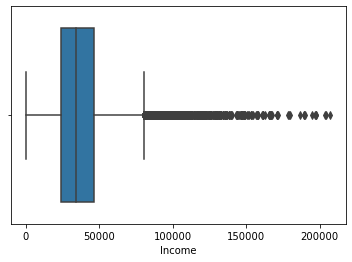

In [164]:
boxplot=sns.boxplot(x='Income',data=df_train) 

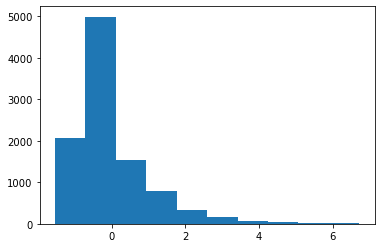

In [165]:
df_train['Z_Score_Income'] = stats.zscore(df['Income'])
Income_outliers = df_train.query('Z_Score_Income > 3 | Z_Score_Income < -3')
Income_sorted = df_train.sort_values(['Z_Score_Income'], ascending = False)

plt.hist(df_train['Z_Score_Income'])
plt.show()

In [166]:
Income_sorted[['Z_Score_Income','Income']].head(n=15)

,Z_Score_Income,Income
8386,6.723894,207249.13
841,6.615804,204542.41
8598,6.585145,203774.65
6406,6.341566,197675.05
1778,6.337618,197576.18
7492,6.311239,196915.63
4331,6.226604,194796.24
7244,6.039496,190110.76
4407,6.011763,189416.27
3073,6.000328,189129.92


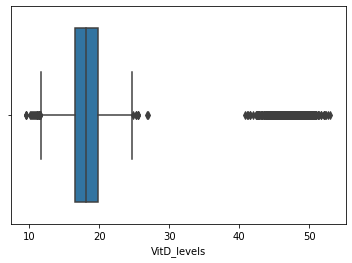

In [167]:
boxplot=sns.boxplot(x='VitD_levels',data=df_train) 

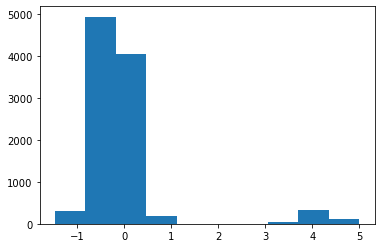

In [168]:
df_train['Z_Score_VitD_levels'] = stats.zscore(df_train['VitD_levels'])
VitD_levels_outliers = df_train.query('Z_Score_VitD_levels > 3 |Z_Score_VitD_levels < -3')
VitD_levels_sorted = df_train.sort_values(['Z_Score_VitD_levels'], ascending = False)

plt.hist(df_train['Z_Score_VitD_levels'])
plt.show()

In [169]:
VitD_levels_sorted[['Z_Score_VitD_levels','VitD_levels']].head(n=15)

,Z_Score_VitD_levels,VitD_levels
1963,4.998865,53.02
1306,4.960191,52.76
7157,4.902181,52.37
7230,4.887307,52.27
2615,4.870945,52.16
3473,4.864996,52.12
7527,4.864996,52.12
580,4.856071,52.06
1798,4.798061,51.67
8681,4.796574,51.66


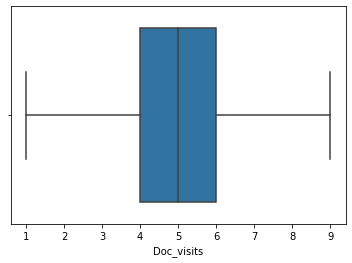

In [170]:
boxplot=sns.boxplot(x='Doc_visits',data=df_train) 

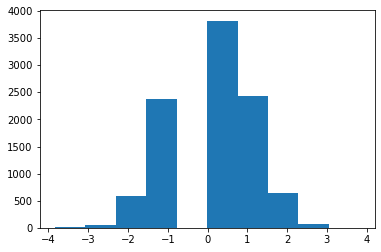

In [171]:
df_train['Z_Score_Doc_visits'] = stats.zscore(df_train['Doc_visits'])
Doc_visits_outliers = df_train.query('Z_Score_Doc_visits > 3 |Z_Score_Doc_visits < -3')
 # Ascending to see less than -3
Doc_visits_sorted = df_train.sort_values(['Z_Score_Doc_visits'], ascending = True) 

plt.hist(df_train['Z_Score_Doc_visits'])
plt.show()

In [172]:
Doc_visits_sorted[['Z_Score_Doc_visits','Doc_visits']].head(n=15)

,Z_Score_Doc_visits,Doc_visits
5645,-3.836921,1
6017,-3.836921,1
6942,-3.836921,1
7143,-3.836921,1
5756,-3.836921,1
6498,-3.836921,1
5629,-2.880608,2
5563,-2.880608,2
1754,-2.880608,2
9692,-2.880608,2


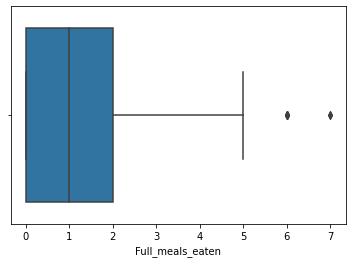

In [173]:
boxplot=sns.boxplot(x='Full_meals_eaten',data=df_train) 

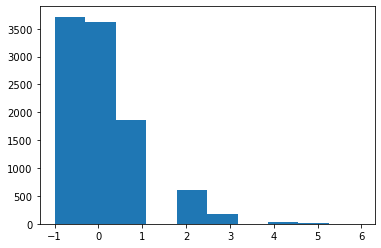

In [174]:
df_train['Z_Score_Full_meals_eaten'] = stats.zscore(df_train['Full_meals_eaten'])
Full_meals_eaten_outliers = df_train.query('Z_Score_Full_meals_eaten > 3 | Z_Score_Full_meals_eaten < -3')
Full_meals_eaten_sorted = df_train.sort_values(['Z_Score_Full_meals_eaten'], ascending = False)

plt.hist(df_train['Z_Score_Full_meals_eaten'])
plt.show()

In [175]:
Full_meals_eaten_sorted[['Z_Score_Full_meals_eaten','Full_meals_eaten']].head(n=15)

,Z_Score_Full_meals_eaten,Full_meals_eaten
4709,5.950600,7
958,5.950600,7
7217,4.958602,6
1231,4.958602,6
8144,4.958602,6
6068,4.958602,6
9986,4.958602,6
2184,4.958602,6
5859,3.966603,5
6694,3.966603,5


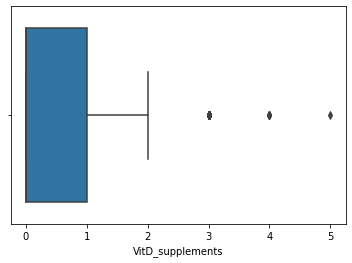

In [176]:
boxplot=sns.boxplot(x='VitD_supplements',data=df_train) 

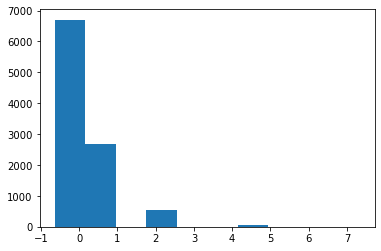

In [177]:
df_train['Z_Score_VitD_supplements'] = stats.zscore(df_train['VitD_supplements'])
VitD_supplements_outliers = df_train.query('Z_Score_VitD_supplements > 3 | Z_Score_VitD_supplements < -3')
VitD_supplements_sorted = df_train.sort_values(['Z_Score_VitD_supplements'], ascending = False)

plt.hist(df_train['Z_Score_VitD_supplements'])
plt.show()

In [178]:
VitD_supplements_sorted[['Z_Score_VitD_supplements','VitD_supplements']].head(n=15)

,Z_Score_VitD_supplements,VitD_supplements
3131,7.321074,5
9091,5.729917,4
2533,5.729917,4
1342,5.729917,4
7180,5.729917,4
2715,5.729917,4
7217,4.138759,3
837,4.138759,3
3900,4.138759,3
7215,4.138759,3


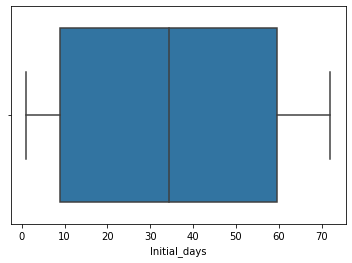

In [179]:
boxplot=sns.boxplot(x='Initial_days',data=df_train)

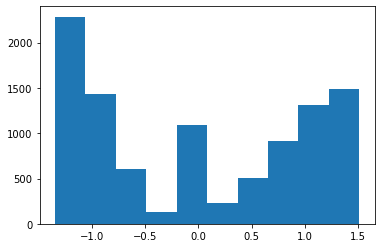

In [180]:
df_train['Z_Score_Initial_days'] = stats.zscore(df_train['Initial_days'])
Initial_days_outliers = df_train.query('Z_Score_Initial_days > 3 | Z_Score_Initial_days < -3')
Initial_days_sorted = df_train.sort_values(['Z_Score_Initial_days'], ascending = False)

plt.hist(df_train['Z_Score_Initial_days'])
plt.show()

In [181]:
Initial_days_sorted[['Z_Score_Initial_days','Initial_days']].head(n=15)

,Z_Score_Initial_days,Initial_days
7968,1.510358,71.98
7479,1.509956,71.97
6166,1.509553,71.96
9159,1.509553,71.96
5829,1.509553,71.96
7524,1.509151,71.95
9074,1.508749,71.94
9677,1.508347,71.93
7839,1.508347,71.93
5162,1.507944,71.92


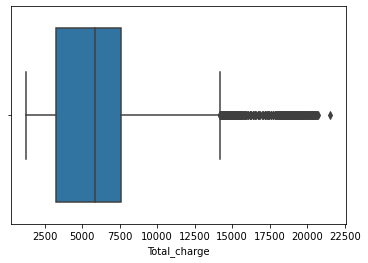

In [182]:
boxplot=sns.boxplot(x='Total_charge',data=df_train) 

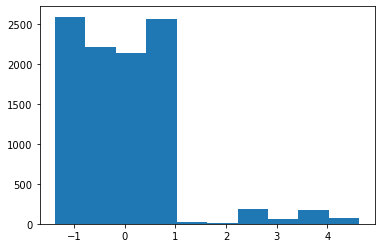

In [183]:
df_train['Z_Score_Total_charge'] = stats.zscore(df_train['Total_charge'])
Total_charge_outliers = df_train.query('Z_Score_Total_charge > 3 | Z_Score_Total_charge < -3')
Total_charg_sorted = df_train.sort_values(['Z_Score_Total_charge'], ascending = False)

plt.hist(df_train['Z_Score_Total_charge'])
plt.show()

In [184]:
Total_charg_sorted[['Z_Score_Total_charge','Total_charge']].head(n=15)

,Z_Score_Total_charge,Total_charge
8800,4.628629,21524.22
9005,4.376881,20673.97
5244,4.369011,20647.39
5453,4.364585,20632.44
9159,4.343740,20562.04
8296,4.342843,20559.01
8101,4.332865,20525.31
5797,4.331390,20520.33
9592,4.315485,20466.61
6826,4.306342,20435.73


#### Re-expression of catagorical varibles:

In [185]:
# Yes or No will be converted to 1 or 0. Categorical columns expressed ordinally.

In [186]:
df.loc[:,['Education','Readmitted','Habitual_soft_drink_use','High_blood','Stroke','Arthritis','Diabetes','Hyperlipidemia','Back_pain','Allergic_rhinitis','Reflux_esophagitis','Asthma','Complication_risk','Anxiety','Overweight']]

,Education,Readmitted,Habitual_soft_drink_use,High_blood,Stroke,Arthritis,Diabetes,Hyperlipidemia,Back_pain,Allergic_rhinitis,Reflux_esophagitis,Asthma,Complication_risk,Anxiety,Overweight
0,"Some College, Less than 1 Year",No,No,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Medium,1,0
1,"Some College, 1 or More Years, No Degree",No,No,Yes,No,No,No,No,No,No,Yes,No,High,0,1
2,"Some College, 1 or More Years, No Degree",No,No,Yes,No,No,Yes,No,No,No,No,No,Medium,0,1
3,GED or Alternative Credential,No,No,No,Yes,Yes,No,No,No,No,Yes,Yes,Medium,0,0
4,Regular High School Diploma,No,Yes,No,No,No,No,Yes,No,Yes,No,No,Low,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Bachelor's Degree,No,No,Yes,No,No,No,No,No,No,Yes,No,Medium,1,1
9996,Regular High School Diploma,Yes,No,Yes,No,Yes,Yes,No,No,No,No,Yes,Medium,0,1
9997,Regular High School Diploma,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,High,1,1
9998,Bachelor's Degree,Yes,No,No,No,No,No,No,Yes,No,No,No,Medium,0,1


In [187]:
df = df.replace(to_replace={'Readmitted':{'Yes':1,'No':0}})

In [188]:
df = df.replace(to_replace={'Habitual_soft_drink_use':{'Yes':1,'No':0}})

In [189]:
df = df.replace(to_replace={'High_blood':{'Yes':1,'No':0}})

In [190]:
df = df.replace(to_replace={'Stroke':{'Yes':1,'No':0}})

In [191]:
df = df.replace(to_replace={'Arthritis':{'Yes':1,'No':0}})

In [192]:
df = df.replace(to_replace={'Diabetes':{'Yes':1,'No':0}})

In [193]:
df = df.replace(to_replace={'Hyperlipidemia':{'Yes':1,'No':0}})

In [194]:
df = df.replace(to_replace={'Back_pain':{'Yes':1,'No':0}})

In [195]:
df = df.replace(to_replace={'Allergic_rhinitis':{'Yes':1,'No':0}})

In [196]:
df = df.replace(to_replace={'Reflux_esophagitis':{'Yes':1,'No':0}})

In [197]:
df = df.replace(to_replace={'Asthma':{'Yes':1,'No':0}})

In [198]:
df = df.replace(to_replace={'Complication_risk':{'Low':1,'Medium':2,'High':3}})

In [199]:
dict_edu = {'Doctorate Degree': 11,
            "Master's Degree": 10,
            "Bachelor's Degree": 9,
            "Associate's Degree": 8,
            'Professional School Degree': 7,
            'Some College, 1 or More Years, No Degree': 6,
            'Some College, Less than 1 Year': 5,
            'Regular High School Diploma': 4,
            'GED or Alternative Credential': 3,
            '9th Grade to 12th Grade, No Diploma': 2,
            'Nursery School to 8th Grade': 1,
            'No Schooling Completed': 0}

df['Education'] = df['Education'].replace(dict_edu)

In [200]:
df.loc[:,['Education','Readmitted','Habitual_soft_drink_use','High_blood','Stroke','Arthritis','Diabetes','Hyperlipidemia','Back_pain','Allergic_rhinitis','Reflux_esophagitis','Asthma','Complication_risk','Anxiety','Overweight']]

,Education,Readmitted,Habitual_soft_drink_use,High_blood,Stroke,Arthritis,Diabetes,Hyperlipidemia,Back_pain,Allergic_rhinitis,Reflux_esophagitis,Asthma,Complication_risk,Anxiety,Overweight
0,5,0,0,1,0,1,1,0,1,1,0,1,2,1,0
1,6,0,0,1,0,0,0,0,0,0,1,0,3,0,1
2,6,0,0,1,0,0,1,0,0,0,0,0,2,0,1
3,3,0,0,0,1,1,0,0,0,0,1,1,2,0,0
4,4,0,1,0,0,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9,0,0,1,0,0,0,0,0,0,1,0,2,1,1
9996,4,1,0,1,0,1,1,0,0,0,0,1,2,0,1
9997,4,1,1,1,0,0,0,0,0,1,0,0,3,1,1
9998,9,1,0,0,0,0,0,0,1,0,0,0,2,0,1


In [201]:
# Extract Clean dataset
df.to_csv(r'C:\temp\D206\d206_clean_medical_data.csv', index=False)

#### Principal Component Analysis

In [202]:
#Define variabels for PCA
pca_health = df[['Population','Children','Age','Education','Income','VitD_levels','Doc_visits','Full_meals_eaten','VitD_supplements','Initial_days','Total_charge','Additional_charges', 
                 'Timely_admission','Timely_treatment', 'Timely_visits', 'Reliability','Options','Hours_of_treatment','Courteous_staff','Evidence_of_active_listening_from_doctor']]

In [203]:
pca_health.head()

,Population,Children,Age,Education,Income,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supplements,Initial_days,Total_charge,Additional_charges,Timely_admission,Timely_treatment,Timely_visits,Reliability,Options,Hours_of_treatment,Courteous_staff,Evidence_of_active_listening_from_doctor
0,2951,1,53,5,86575.93,17.80,6,0,0,10.59,3191.05,17939.40,3,3,2,2,4,3,3,4
1,11303,3,51,6,46805.99,18.99,4,2,1,15.13,4214.91,17613.00,3,4,3,4,4,4,3,3
2,17125,3,53,6,14370.14,17.42,4,1,0,4.77,2177.59,17505.19,2,4,4,4,3,4,3,3
3,2162,0,78,3,39741.49,17.42,4,1,0,1.71,2465.12,12993.44,3,5,5,3,4,5,5,5
4,5287,1,22,4,1209.56,16.87,5,0,2,1.25,1885.66,3716.53,2,1,3,3,5,3,4,3


In [204]:
# Normalize the data
pca_health_norm=(pca_health - pca_health.mean())/pca_health.std()
pca_health_norm

,Population,Children,Age,Education,Income,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supplements,Initial_days,Total_charge,Additional_charges,Timely_admission,Timely_treatment,Timely_visits,Reliability,Options,Hours_of_treatment,Courteous_staff,Evidence_of_active_listening_from_doctor
0,-0.473145,-0.424629,-0.012465,-0.239890,1.904878,-0.239866,0.944599,-0.993337,-0.634681,-0.959119,-0.799539,0.764967,-0.502730,-0.489648,-1.463173,-1.462054,0.488355,-0.506114,-0.483647,0.470397
1,0.090237,0.618685,-0.123615,0.120035,0.316799,-0.062870,-0.967932,0.990560,0.956397,-0.776498,-0.496402,0.715078,-0.502730,0.476699,-0.494890,0.467923,0.488355,0.462525,-0.483647,-0.489009
2,0.482959,0.618685,-0.012465,0.120035,-0.978418,-0.296385,-0.967932,-0.001389,-0.634681,-1.193227,-1.099596,0.698600,-1.471754,0.476699,0.473394,0.467923,-0.482337,0.462525,-0.483647,-0.489009
3,-0.526366,-0.946285,1.376900,-0.959741,0.034702,-0.296385,-0.967932,-0.001389,-0.634681,-1.316315,-1.014466,0.009004,-0.502730,1.443046,1.441677,-0.497066,0.488355,1.431165,1.474440,1.429802
4,-0.315570,-0.424629,-1.735279,-0.599816,-1.503941,-0.378190,-0.011666,-0.993337,2.547475,-1.334818,-1.186028,-1.408919,-1.471754,-2.422343,-0.494890,-0.497066,1.459048,-0.506114,0.495396,-0.489009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.350984,-0.424629,-1.568555,1.199811,0.283321,-0.436197,-0.967932,0.990560,0.956397,0.688892,0.224926,-0.612430,-0.502730,-1.455995,-1.463173,-0.497066,0.488355,-0.506114,0.495396,-1.448415
9996,-0.587818,1.140342,1.877072,-0.599816,-0.953944,-0.143187,-0.011666,-0.993337,-0.634681,1.377138,0.580295,2.380188,-0.502730,-0.489648,0.473394,-1.462054,1.459048,-0.506114,0.495396,0.470397
9997,-0.636318,0.618685,-0.012465,-0.599816,1.079966,-0.544774,-0.967932,0.990560,-0.634681,0.000645,0.543118,0.358677,-0.502730,-0.489648,-0.494890,0.467923,0.488355,-1.474753,-0.483647,-1.448415
9998,-0.653923,0.618685,-0.568212,1.199811,-0.366178,0.378876,-0.011666,0.990560,0.956397,1.163545,0.761287,-0.787584,1.435319,1.443046,-0.494890,0.467923,0.488355,-0.506114,0.495396,-0.489009


In [205]:
# Identify the number of PCs
pca = PCA(n_components=pca_health_norm.shape[1])

In [206]:
pca.fit(pca_health_norm)

PCA(n_components=20)

In [207]:
pca_health= pd.DataFrame(pca.transform(pca_health_norm)
     ,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20'])

In [208]:
# PCA Loadings
loadings = pd.DataFrame(pca.components_.T,
                        columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20'], 
                        index=pca_health_norm.columns)
loadings


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
Population,0.010224,0.019193,0.028549,-0.025796,0.505268,0.015743,0.044501,-0.399000,0.360717,0.231650,0.022934,0.628369,0.012824,0.026559,-0.006848,-0.022787,-0.024888,-0.009483,-0.004775,-0.001530
Children,0.002477,0.002922,0.018463,0.012543,0.145260,-0.019669,0.700147,0.415480,0.452453,0.202036,0.086361,-0.242251,0.052170,0.003915,0.014805,-0.015596,-0.014267,-0.008859,-0.002559,-0.002426
Age,0.000520,0.082718,-0.027540,0.700034,0.023961,-0.015449,0.006361,-0.030344,-0.020569,-0.008664,-0.019895,-0.008578,-0.003007,0.024370,-0.006263,0.031661,-0.057708,-0.701513,-0.047342,-0.016519
Education,0.003664,-0.000900,0.014346,-0.028327,0.102188,0.334297,0.474159,-0.540931,-0.480176,0.104127,0.241363,-0.241766,0.025550,-0.010821,-0.007437,0.001562,-0.017758,0.005420,-0.005951,-0.004619
Income,-0.002443,-0.005417,-0.018488,-0.007152,0.181775,0.623883,0.149210,0.330871,-0.203586,-0.251665,-0.514768,0.268621,-0.057268,-0.014105,-0.006199,0.007359,-0.003562,-0.006513,-0.002600,-0.001053
VitD_levels,-0.009474,0.537722,0.052469,-0.050664,-0.283193,0.257637,-0.109513,-0.017136,0.084007,0.478245,-0.115173,-0.021298,-0.009317,-0.008363,-0.004267,-0.008118,0.010033,-0.024539,0.009810,0.544105
Doc_visits,0.007134,-0.004195,-0.008200,0.012061,0.183589,0.539259,-0.349702,-0.106095,0.470321,-0.284399,0.304918,-0.380474,-0.015022,0.028120,-0.025157,0.008284,-0.010430,-0.003953,-0.002035,-0.000168
Full_meals_eaten,-0.000632,-0.010811,0.017866,0.037979,-0.545339,0.211123,0.190986,0.101765,0.063694,-0.232867,0.531340,0.512656,0.062842,0.038573,-0.012566,0.000517,0.014002,-0.010304,0.000592,-0.001443
VitD_supplements,-0.005119,0.032906,0.009204,0.011216,0.413749,0.070174,-0.257439,0.490913,-0.385579,0.322935,0.503431,0.079232,0.039106,-0.027502,0.013300,-0.003164,0.010171,-0.006371,-0.000282,-0.001504
Initial_days,-0.020491,0.441804,0.069265,-0.069674,0.307395,-0.299984,0.140830,0.016899,-0.095763,-0.599804,0.127689,0.013762,-0.001212,0.023158,0.009479,0.012647,-0.002521,-0.003906,-0.019298,0.451138


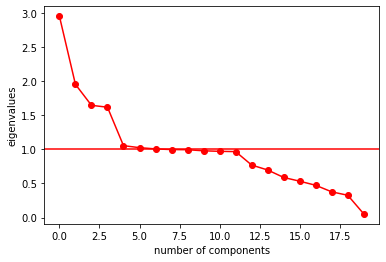

In [209]:
# Select and plot PCAs
cov_matrix = np.dot(pca_health_norm.T, pca_health_norm) / pca_health.shape[0]

eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) 
               for eigenvector in pca.components_]

plt.plot(eigenvalues, 'ro-')
plt.xlabel('number of components')
plt.ylabel('eigenvalues')
plt.axhline(y=1,color='red')
plt.show()

In [210]:
# count number of components 
eg_count = 0
for x in eigenvalues:
    if x >= 1:
        eg_count +=1
eg_count

7

In [211]:
# Extract reduced dataset & print 7 components
pca_reduced = pca_health.iloc[ : , :eg_count]
pca_reduced

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.525789,-1.166650,0.190464,0.663360,0.309025,1.658453,-0.680246
1,-0.358822,-0.657103,-0.119826,0.538880,-0.297089,0.198795,0.764313
2,-0.194760,-1.338146,-0.773747,0.602033,-0.499943,-0.882443,0.789120
3,2.385300,-1.345335,0.262037,1.176435,-1.195453,-0.557313,-0.838388
4,-2.408505,-1.824254,-0.192543,-1.966105,0.645484,-0.839011,-1.877392
...,...,...,...,...,...,...,...
9995,-2.113711,0.038289,-0.071282,-1.549666,-0.130204,0.048971,0.738187
9996,-0.660739,1.115966,1.407151,2.947294,0.447456,-1.523659,0.469637
9997,-1.903227,-0.002592,0.134432,0.314271,-0.925559,-0.075168,1.100744
9998,0.819882,1.070900,1.052460,-1.009115,-0.111520,0.155172,1.029171
